In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
import scipy
import random
import pylab

from sklearn import cluster
from sklearn.metrics.pairwise import pairwise_distances

# This is importing a "future" python version 3 print function.
from __future__ import print_function
from __future__ import division
%matplotlib inline
sns.set()
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

/Users/Franklin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


18189


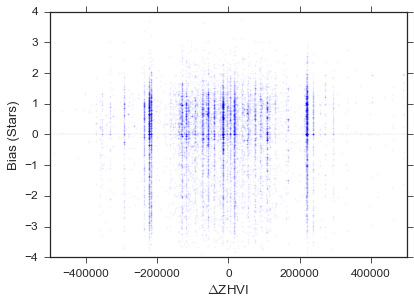

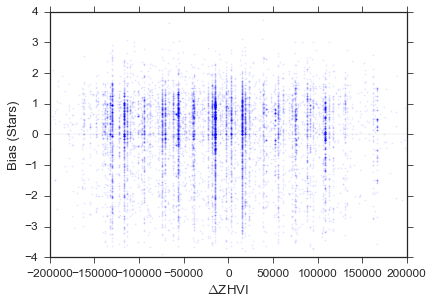

In [54]:
tb = pd.read_csv('travel_bias.csv', header = None)
tb = tb.dropna()
tb = tb[tb[2] != 0.0]
print(len(tb))
plt.figure()
plt.scatter(tb[2], tb[3], lw = 0, s = 3, alpha = 0.05)
plt.xlim(-500000, 500000)
plt.ylim(-4,4)
plt.xlabel('$\Delta$ZHVI')
plt.ylabel('Bias (Stars)')
plt.axhline(0, lw = 0.1, c = 'grey')
plt.savefig('travel_bias.png', dpi = 300, fmt = 'png')

plt.figure()
plt.scatter(tb[2], tb[3], lw = 0, s = 3, alpha = 0.1)
plt.xlim(-200000, 200000)
plt.ylim(-4,4)
plt.xlabel('$\Delta$ZHVI')
plt.ylabel('Bias (Stars)')
plt.axhline(0, lw = 0.1, c = 'grey')
plt.savefig('travel_bias_zoom.png', dpi = 300, fmt = 'png')
#sns.despine()

In [23]:
def ResExam(x, y, bins = 10):
    
    '''
    Dependencies:
        import scipy
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
    
    '''
    
    bm, be, _ = scipy.stats.binned_statistic(x, y, statistic = 'mean', bins = bins)
    bs, _, _ = scipy.stats.binned_statistic(x, y, statistic = 'std', bins = bins)
    berr, _ ,_ = scipy.stats.binned_statistic(x, y, statistic = scipy.stats.sem, bins = bins)

    bin_width = (be[1] - be[0]) #compute the bin width, to calculate the bin centers
    bc = be[1:] - bin_width/2 #compute the bin centers

    fig = plt.figure()
    #plt.scatter(x,y, lw = 0, s = 0.5, alpha = 1, c = 'black') #lightly scatter the original data
    plt.errorbar(bc, bm, berr, fmt = '.',color = 'red', lw = 1) #now draw the binned statistic
    plt.axhline(0, c = 'grey', lw = 0.5) #plot the 0 residual line

    plt.gca().yaxis.set_label_coords(-0.12, 0.5)
    sns.despine()
    
    return bc, bm, berr, np.std(y), fig

def per95(x):
    return np.percentile(x,95)

def per98(x):
    return np.percentile(x,98)

def per5(x):
    return np.percentile(x,5)

def per75(x):
    return np.percentile(x,75)

def per50(x):
    return np.percentile(x,50)

def per25(x):
    return np.percentile(x,25)
    
def PercentileFit(x, y, statfunc, bins = 20, savefig = True, name = 'fit_residual'):
    
    '''
    Dependencies:
        import scipy
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
    
    '''
    
    bp, be, _  = scipy.stats.binned_statistic(x, y, statistic = statfunc, bins = bins)

    bin_width = (be[1] - be[0]) #compute the bin width, to calculate the bin centers
    bc = be[1:] - bin_width/2 #compute the bin centers
    
    return bp, bc

In [79]:
nbins = 50

y_75, x_75 = PercentileFit(tb[2], tb[3], per75, bins = nbins)
y_50, x_50 = PercentileFit(tb[2], tb[3], per50, bins = nbins)
y_25, x_25 = PercentileFit(tb[2], tb[3], per25, bins = nbins)

18189


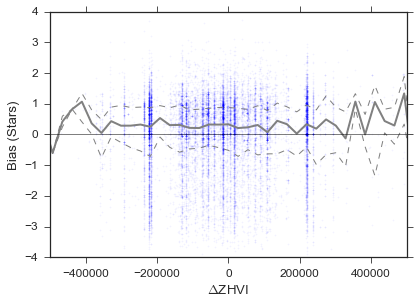

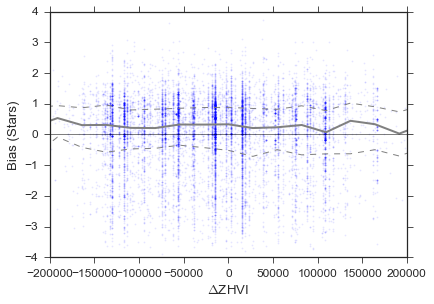

In [85]:
tb = pd.read_csv('travel_bias.csv', header = None)
tb = tb.dropna()
tb = tb[tb[2] != 0.0]
print(len(tb))

plt.figure()
plt.scatter(tb[2], tb[3], lw = 0, s = 3, alpha = 0.05)
plt.plot(x_50, y_50, c = 'grey', lw = 2)
plt.plot(x_25, y_25, c = 'grey', lw = 1, ls = '--')
plt.plot(x_75, y_75, c = 'grey', lw = 1, ls = '--')
plt.xlim(-500000, 500000)
plt.ylim(-4,4)
plt.xlabel('$\Delta$ZHVI')
plt.ylabel('Bias (Stars)')
plt.axhline(0, lw = 0.5, c = 'black')
plt.savefig('travel_bias.png', dpi = 300, fmt = 'png')

plt.figure()
plt.scatter(tb[2], tb[3], lw = 0, s = 3, alpha = 0.10)
plt.plot(x_50, y_50, c = 'grey', lw = 2)
plt.plot(x_25, y_25, c = 'grey', lw = 1, ls = '--')
plt.plot(x_75, y_75, c = 'grey', lw = 1, ls = '--')
plt.xlim(-200000, 200000)
plt.ylim(-4,4)
plt.xlabel('$\Delta$ZHVI')
plt.ylabel('Bias (Stars)')
plt.axhline(0, lw = 0.5, c = 'black')
plt.savefig('travel_bias_zoom.png', dpi = 300, fmt = 'png')